</style>
<h1  style="text-align:center;font-size:60px">  Machine Learning Projects
    <h2 style="text-align:center">Regression Dataset : Boston Housing</h2>
    <br><br>
    <h2 style="text-align:left;font-size:20px">
        <u> Date:</u> April 2021 <br><br>
        <u> Groupe 24:</u><br><br>
          <li>Anas Krichel ( anas.krichel@telecom-paris.fr )</li>
          <li>Maha Meihemid ( meihemid.meihemid@telecom-paris.fr )</li>
          <li>Louis Dorge ( ldorge@telecom-paris.fr )</li><br> 
     </h2>
</h1>

# III.Data Set : Boston Housing¶( Regression Dataset)

## Data Set Informartion :


This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive (http://lib.stat.cmu.edu/datasets/boston), and has been used extensively throughout the literature to benchmark algorithms. However, these comparisons were primarily done outside of Delve and are thus somewhat suspect. The dataset is small in size with only 506 cases.

The data was originally published by Harrison, D. and Rubinfeld, D.L. `Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.

Dataset Naming
The name for this dataset is simply boston. It has two prototasks: nox, in which the nitrous oxide level is to be predicted; and price, in which the median value of a home is to be predicted


Dataset website : https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

Work on regression task on the boston housing dataset

In [1]:
#useful imports :

from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn import svm, linear_model, metrics
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_validate, train_test_split, GridSearchCV

There are 14 covariates. So the task will not be simple because the covariates can have different degree of correlation. 

In [2]:
#creation of an array called -values- where all the data is stocked

text_file = open("boston_dataset.csv", "r")
lines = text_file. read().splitlines()
text_file. close()
len_col = 14
len_lines=int((len(lines)-2)/2)

values = np.zeros((len_lines,14))

for line in range (1,len_lines+1): #len_lines):
    number=True
    place=0
    d=0
    real_line = 2*line
    f=len(lines[real_line])
    
    for i in range(f):
        if (lines[real_line][i]==" " and number==True):
            values[line-1,place]=float(lines[real_line][d:i])
            number=False
            d=i+1
            place=place+1
        elif (lines[real_line][i]!=" " and lines[real_line][i-1]==" "):
            number = True
            d=i
        if (i==f-1):
            values[line-1,place]=float(lines[real_line][d:i])
            number=True
            place=place+1
            
    d=0
    real_line = 2*line+1
    f=len(lines[real_line])

    for i in range(f):
        if (lines[real_line][i]==" " and number==True):
            values[line-1,place]=float(lines[real_line][d:i])
            number=False
            d=i+1
            place=place+1
        elif (lines[real_line][i]!=" " and lines[real_line][i-1]==" "):
            number = True
            d=i
        if (i==f-1):
            values[line-1,place]=float(lines[real_line][d:i])
            number=True
            place=place+1

In [3]:
#split the values into train and test dataset

values_train, values_test = train_test_split(values, 
                      test_size=0.3)

In [4]:
#preprocessing : normalisation

X_train_1 = np.array(values_train[:,0:4])
X_train_2 = np.array(values_train[:,5:13])
X_train = np.concatenate((X_train_1,X_train_2), axis=1)

y_train_price = values_train[:,13]
y_train_nox = values_train[:,4]

X_test_1 = np.array(values_test[:,0:4])
X_test_2 = np.array(values_test[:,5:13])
X_test = np.concatenate((X_test_1,X_test_2), axis=1)

y_test_price = values_test[:,13]
y_test_nox = values_test[:,4]

mean_X_train=np.mean(X_train, axis=0)
mean_y_train_price=np.mean(y_train_price, axis=0)
mean_y_train_nox=np.mean(y_train_nox, axis=0)
mean_X_test=np.mean(X_test, axis=0)
mean_y_test_price=np.mean(y_test_price, axis=0)
mean_y_test_nox=np.mean(y_test_nox, axis=0)

X_train = X_train-mean_X_train
y_train_price = y_train_price-mean_y_train_price
y_train_nox = y_train_nox-mean_y_train_nox
X_test = X_test-mean_X_test
y_test_price = y_test_price-mean_y_test_price
y_test_nox = y_test_nox-mean_y_test_nox

std_X_train=np.std(X_train, axis=0)
#std_y_train=np.std(y_train, axis=0)
std_X_test=np.std(X_test, axis=0)
#std_y_test=np.std(y_test, axis=0)

std_X_train[std_X_train == 0] = 1
std_X_test[std_X_test == 0] = 1

X_train = (X_train)/(std_X_train)**2
X_test = (X_test)/(std_X_test)**2


In [5]:
# functions that indicate us the efficiency of the method used

def determination_coefficient(Y_true,Y_pred):
    # We will use the second formula
    Y_bar=np.mean(Y_true)
    SSE=np.sum((Y_true-Y_pred)**2)
    SST=np.sum((Y_true - Y_bar)**2)
    return 1-(SSE/SST)

def MSE(Y_true,Y_pred):
    return np.mean((Y_true - Y_pred)**2)


Price estimation


Determination coefficient R^2 = 0.7143.


Mean Squared Error MSE = 24.3528.



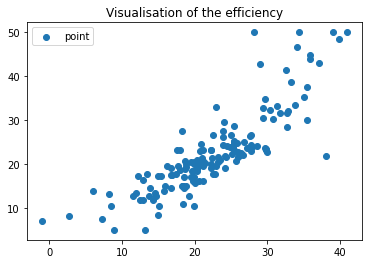

In [6]:
Results = []

lin_reg = linear_model.LinearRegression(fit_intercept=False)
lin_reg.fit(X_train, y_train_price)

Y_pred_price=lin_reg.predict(X_test)
print('\nPrice estimation\n')
print('\nDetermination coefficient R^2 = {:.4f}.\n'.format(determination_coefficient(y_test_price,Y_pred_price)))
print('\nMean Squared Error MSE = {:.4f}.\n'.format(MSE(y_test_price,Y_pred_price)))

plt.figure()
plt.scatter(Y_pred_price+mean_y_test_price,y_test_price+mean_y_test_price,label='point')
plt.title('Visualisation of the efficiency')
plt.legend()
plt.show()

#Results.append("Linear Regression (price estimation): "+ " "+"R^2 : "+" "+str(determination_coefficient(y_test_price,Y_pred_price)))
#print(Results)


Nox estimation


Determination coefficient R^2 = 0.7480.


Mean Squared Error MSE = 0.0036.



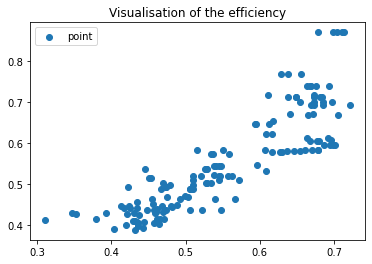

In [7]:
lin_reg = linear_model.LinearRegression(fit_intercept=False)
lin_reg.fit(X_train, y_train_nox)

Y_pred_nox=lin_reg.predict(X_test)
print('\nNox estimation\n')
print('\nDetermination coefficient R^2 = {:.4f}.\n'.format(determination_coefficient(y_test_nox,Y_pred_nox)))
print('\nMean Squared Error MSE = {:.4f}.\n'.format(MSE(y_test_nox,Y_pred_nox)))

plt.figure()
plt.scatter(Y_pred_nox+mean_y_test_nox,y_test_nox+mean_y_test_nox,label='point')
plt.title('Visualisation of the efficiency')
plt.legend()
plt.show()

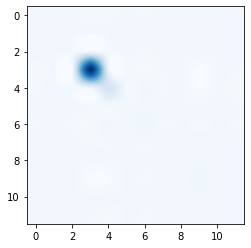

In [8]:
covMatrix = np.cov(X_train.T, bias=True)
np.shape(covMatrix)
plt.imshow(covMatrix, cmap='Blues',interpolation="Spline16")

Problème avec la comatrice ... 

In [9]:
U, s, V = np.linalg.svd(covMatrix)
PC= U @ np.diag(s)



Price estimation


Determination coefficient R^2 = 0.5465.


Mean Squared Error MSE = 38.6555.



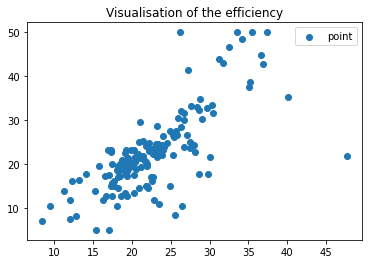

In [10]:
#Computation of projected data for both the train and the test data
X_train_proj=X_train @ U[:,:2]
X_test_proj=X_test @ U[:,:2]

#Linear regression
reg = linear_model.LinearRegression(fit_intercept=False)
reg.fit(X_train_proj, y_train_price)

#Determination coefficient and mean squared error
Y_pred_price=reg.predict(X_test_proj)
print('\nPrice estimation\n')
print('\nDetermination coefficient R^2 = {:.4f}.\n'.format(determination_coefficient(y_test_price,Y_pred_price)))
print('\nMean Squared Error MSE = {:.4f}.\n'.format(MSE(y_test_price,Y_pred_price)))

plt.figure()
plt.scatter(Y_pred_price+mean_y_test_price,y_test_price+mean_y_test_price,label='point')
plt.title('Visualisation of the efficiency')
plt.legend()
plt.show()


Nox estimation


Determination coefficient R^2 = 0.1495.


Mean Squared Error MSE = 0.0122.



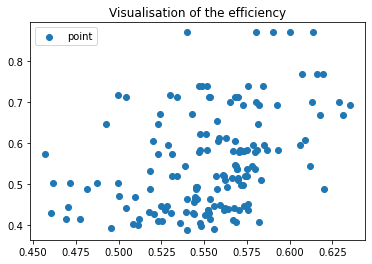

In [11]:
#Computation of projected data for both the train and the test data
X_train_proj=X_train @ U[:,:2]
X_test_proj=X_test @ U[:,:2]

#Linear regression
reg = linear_model.LinearRegression(fit_intercept=False)
reg.fit(X_train_proj, y_train_nox)

#Determination coefficient and mean squared error
Y_pred_nox=reg.predict(X_test_proj)
print('\nNox estimation\n')
print('\nDetermination coefficient R^2 = {:.4f}.\n'.format(determination_coefficient(y_test_nox,Y_pred_nox)))
print('\nMean Squared Error MSE = {:.4f}.\n'.format(MSE(y_test_nox,Y_pred_nox)))

plt.figure()
plt.scatter(Y_pred_nox+mean_y_test_nox,y_test_nox+mean_y_test_nox,label='point')
plt.title('Visualisation of the efficiency')
plt.legend()
plt.show()


Price estimation


Determination coefficient R^2 = 0.5169.


Mean Squared Error MSE = 41.1741.


Regularization parameter selected by the algorithm = 1.0023.



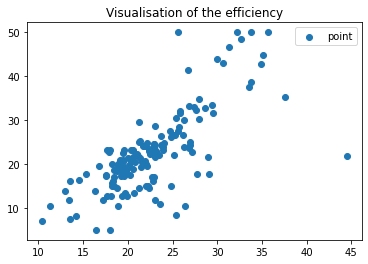

In [12]:
#Different values of the regularization parameter spaced evenly on a log scale
param = np.logspace(10**(-3), 10**1, num=30)

#Lasso model
reg = linear_model.LassoCV(alphas=param, fit_intercept=False)
reg.fit(X_train, y_train_price)

#Determination coefficient and the MSE of the test data
Y_pred_price=reg.predict(X_test)
print('\nPrice estimation\n')
print('\nDetermination coefficient R^2 = {:.4f}.\n'.format(determination_coefficient(y_test_price,Y_pred_price)))
print('\nMean Squared Error MSE = {:.4f}.\n'.format(MSE(y_test_price,Y_pred_price)))

#Regularization parameter that the algorithm selects
print('\nRegularization parameter selected by the algorithm = {:.4f}.\n'.format(reg.alpha_))

plt.figure()
plt.scatter(Y_pred_price+mean_y_test_price,y_test_price+mean_y_test_price,label='point')
plt.title('Visualisation of the efficiency')
plt.legend()
plt.show()

Il y a un problème là pour la nox estimation, tout est comme pour le price estimation mais ça ne marche pas ...


Price estimation


Determination coefficient R^2 = 0.0000.


Mean Squared Error MSE = 0.0143.


Regularization parameter selected by the algorithm = 10000000000.0000.



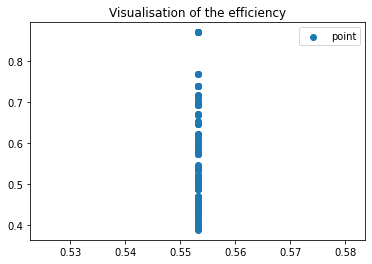

In [13]:
#Different values of the regularization parameter spaced evenly on a log scale
param = np.logspace(10**(-3), 10**1, num=30)

#Lasso model
reg = linear_model.LassoCV(alphas=param, fit_intercept=False)
reg.fit(X_train, y_train_nox)

#Determination coefficient and the MSE of the test data
Y_pred_nox=reg.predict(X_test)
print('\nPrice estimation\n')
print('\nDetermination coefficient R^2 = {:.4f}.\n'.format(determination_coefficient(y_test_nox,Y_pred_nox)))
print('\nMean Squared Error MSE = {:.4f}.\n'.format(MSE(y_test_nox,Y_pred_nox)))

#Regularization parameter that the algorithm selects
print('\nRegularization parameter selected by the algorithm = {:.4f}.\n'.format(reg.alpha_))

plt.figure()
plt.scatter(Y_pred_nox+mean_y_test_nox,y_test_nox+mean_y_test_nox,label='point')
plt.title('Visualisation of the efficiency')
plt.legend()
plt.show()


Regularization parameter selected by the algorithm = 1.2589.


Price estimation


Determination coefficient R^2 = 0.7111.


Mean Squared Error MSE = 24.6202.



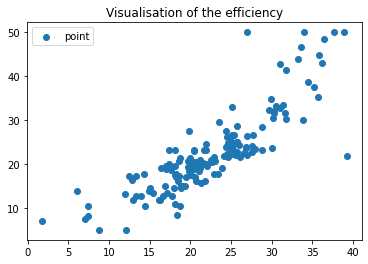

In [14]:
#Different values of the regularization parameter spaced evenly on a log scale
param = np.logspace(10**(-1), 10**2, num=30)

#Lasso model
reg = linear_model.RidgeCV(alphas=param, fit_intercept=False)
reg.fit(X_train, y_train_price)

#Regularization parameter that the algorithm selects
print('\nRegularization parameter selected by the algorithm = {:.4f}.\n'.format(reg.alpha_))


#Determination coefficient and the MSE of the test data
Y_pred_price=reg.predict(X_test)
print('\nPrice estimation\n')
print('\nDetermination coefficient R^2 = {:.4f}.\n'.format(determination_coefficient(y_test_price,Y_pred_price)))
print('\nMean Squared Error MSE = {:.4f}.\n'.format(MSE(y_test_price,Y_pred_price)))
    
plt.figure()
plt.scatter(Y_pred_price+mean_y_test_price,y_test_price+mean_y_test_price,label='point')
plt.title('Visualisation of the efficiency')
plt.legend()
plt.show()


Regularization parameter selected by the algorithm = 1.2589.


Nox estimation


Determination coefficient R^2 = 0.7289.


Mean Squared Error MSE = 0.0039.



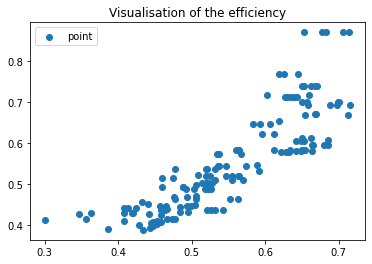

In [15]:
#Different values of the regularization parameter spaced evenly on a log scale
param = np.logspace(10**(-1), 10**2, num=30)

#Lasso model
reg = linear_model.RidgeCV(alphas=param, fit_intercept=False)
reg.fit(X_train, y_train_nox)

#Regularization parameter that the algorithm selects
print('\nRegularization parameter selected by the algorithm = {:.4f}.\n'.format(reg.alpha_))


#Determination coefficient and the MSE of the test data
Y_pred_nox=reg.predict(X_test)
print('\nNox estimation\n')
print('\nDetermination coefficient R^2 = {:.4f}.\n'.format(determination_coefficient(y_test_nox,Y_pred_nox)))
print('\nMean Squared Error MSE = {:.4f}.\n'.format(MSE(y_test_nox,Y_pred_nox)))
    
plt.figure()
plt.scatter(Y_pred_nox+mean_y_test_nox,y_test_nox+mean_y_test_nox,label='point')
plt.title('Visualisation of the efficiency')
plt.legend()
plt.show()

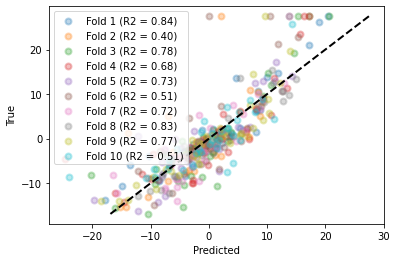


Price estimation


Determination coefficient R^2 = 0.7076.


Mean Squared Error MSE = 24.9245.



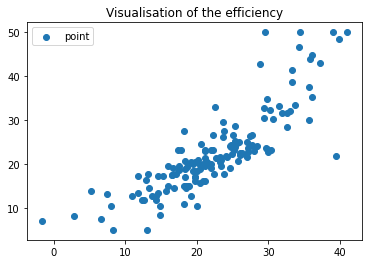

In [16]:
## call model
k_fold = linear_model.LinearRegression()

## K fold validation
scores = []
cv = KFold(n_splits=10, shuffle=True)
fig = plt.figure()
i = 1
for train, test in cv.split(X_train, y_train_price):
    prediction = k_fold.fit(X_train[train],
                 y_train_price[train]).predict(X_train[test])
    true = y_train_price[test]
    score = metrics.r2_score(true, prediction)
    scores.append(score)
    plt.scatter(prediction, true, lw=2, alpha=0.3, label='Fold %d (R2 = %0.2f)' % (i,score))
    i = i+1
plt.plot([min(y_train_price),max(y_train_price)], [min(y_train_price),max(y_train_price)], linestyle='--', lw=2, color='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.legend()
plt.show()

Y_pred_price=k_fold.predict(X_test)
print('\nPrice estimation\n')
print('\nDetermination coefficient R^2 = {:.4f}.\n'.format(determination_coefficient(y_test_price,Y_pred_price)))
print('\nMean Squared Error MSE = {:.4f}.\n'.format(MSE(y_test_price,Y_pred_price)))
    
plt.figure()
plt.scatter(Y_pred_price+mean_y_test_price,y_test_price+mean_y_test_price,label='point')
plt.title('Visualisation of the efficiency')
plt.legend()
plt.show()

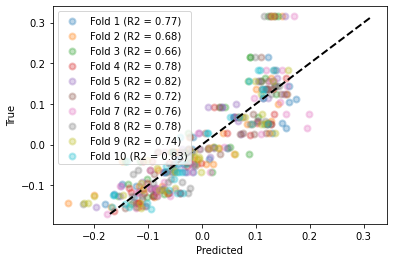


Nox estimation


Determination coefficient R^2 = 0.7475.


Mean Squared Error MSE = 0.0036.



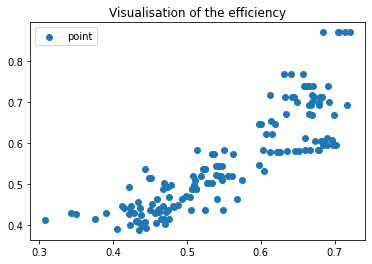

In [17]:
## call model
k_fold = linear_model.LinearRegression()

## K fold validation
scores = []
cv = KFold(n_splits=10, shuffle=True)
fig = plt.figure()
i = 1
for train, test in cv.split(X_train, y_train_nox):
    prediction = k_fold.fit(X_train[train],
                 y_train_nox[train]).predict(X_train[test])
    true = y_train_nox[test]
    score = metrics.r2_score(true, prediction)
    scores.append(score)
    plt.scatter(prediction, true, lw=2, alpha=0.3, label='Fold %d (R2 = %0.2f)' % (i,score))
    i = i+1
plt.plot([min(y_train_nox),max(y_train_nox)], [min(y_train_nox),max(y_train_nox)], linestyle='--', lw=2, color='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.legend()
plt.show()

Y_pred_nox=k_fold.predict(X_test)
print('\nNox estimation\n')
print('\nDetermination coefficient R^2 = {:.4f}.\n'.format(determination_coefficient(y_test_nox,Y_pred_nox)))
print('\nMean Squared Error MSE = {:.4f}.\n'.format(MSE(y_test_nox,Y_pred_nox)))

plt.figure()
plt.scatter(Y_pred_nox+mean_y_test_nox,y_test_nox+mean_y_test_nox,label='point')
plt.title('Visualisation of the efficiency')
plt.legend()
plt.show()

In conclusion wa have seen that different methods enable us to achieve different results. The Kfold method based on a linear regression seems to be the most adapted for our dataset because the R^2 coefficient for both the nox and the price is good. 